# Random Forest Regression
This notebook is used to perform Random Forest Regression on the data as well as analysis and discussion.

In [1]:
import pandas as pd
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

## Encode the categorical variables

In [2]:
pickup = pd.read_csv('../data/curated/pickup.csv')
categorical_features_pu = ['pulocationid', 'pickup_hour', 'pickup_dayofweek', 'season']

# Encode pickup data
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
encoder = enc.fit_transform(pickup[categorical_features_pu])
encoded_features_pu = pd.DataFrame(encoder, columns=enc.get_feature_names_out())
pickup_df = pd.concat([pickup.drop(categorical_features_pu, axis=1), encoded_features_pu], axis=1)

# Encode dropoff data
dropoff = pd.read_csv('../data/curated/dropoff.csv')
categorical_features_do = ['dolocationid', 'dropoff_hour', 'dropoff_dayofweek', 'season']
enc2 = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
encoder2 = enc2.fit_transform(dropoff[categorical_features_do])
encoded_features_do = pd.DataFrame(encoder2, columns=enc2.get_feature_names_out())
dropoff_df = pd.concat([dropoff.drop(categorical_features_do, axis=1), encoded_features_do], axis=1)

## Hyperparameter Tuning
For RandomForestRegressor, we will tune the following set of parameters: 
- n_estimators: number of trees in the forest. Although more number of trees lead to better performance, it takes slower time to run.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
- max_features: The number of features to consider when looking for the best split.

Note: the code for hyperparameter tuning is commented by default because it takes long time to run. If needed, it can be uncommented and rerun, but it will lead to similar parameter values.

In [3]:
# # Define the hyperparameters and their respective values
# hyperparameters = {
#     'n_estimators': [50, 100, 200],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['log2', 'sqrt', None]
# }
# X_train = pickup_df.loc[pickup['year'] == 2022].drop(['year', 'pickup_count'], axis=1)
# y_train = pickup_df.loc[pickup['year'] == 2022]['pickup_count']

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# # Create the RandomForestRegressor
# rf_regressor = RandomForestRegressor()

# # Iterate over each hyperparameter and perform GridSearchCV
# best_params = {}

# for param_name, param_values in hyperparameters.items():
#     grid_search = GridSearchCV(estimator=rf_regressor, param_grid={param_name: param_values},
#                                scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
#     grid_search.fit(X_train_scaled, y_train)
#     best_params[param_name] = grid_search.best_params_[param_name]
#     print(param_name, ": ", best_params[param_name])
# print(best_params)

Now, we need to separate the data into six different boroughs.

### Pickup Data

In [4]:
borough_data = []

queens_df = pickup_df.loc[pickup_df['borough'] == 'Queens'].drop(['borough'], axis=1)
brooklyn_df = pickup_df.loc[pickup_df['borough'] == 'Brooklyn'].drop(['borough'], axis=1)
manhattan_df = pickup_df.loc[pickup_df['borough'] == 'Manhattan'].drop(['borough'], axis=1)
si_df = pickup_df.loc[pickup_df['borough'] == 'Staten Island'].drop(['borough'], axis=1)
bronx_df = pickup_df.loc[pickup_df['borough'] == 'Bronx'].drop(['borough'], axis=1)
airport_df = pickup_df.loc[pickup_df['borough'] == 'Airport'].drop(['borough'], axis=1)

borough_data.append(('pickup', 'Queens', queens_df))
borough_data.append(('pickup', 'Brooklyn', brooklyn_df))
borough_data.append(('pickup', 'Manhattan', manhattan_df))
borough_data.append(('pickup', 'Staten Island', si_df))
borough_data.append(('pickup', 'Bronx', bronx_df))
borough_data.append(('pickup', 'Airport', airport_df))

### Dropoff Data

In [5]:
queens_df = dropoff_df.loc[dropoff_df['borough'] == 'Queens'].drop(['borough'], axis=1)
brooklyn_df = dropoff_df.loc[dropoff_df['borough'] == 'Brooklyn'].drop(['borough'], axis=1)
manhattan_df = dropoff_df.loc[dropoff_df['borough'] == 'Manhattan'].drop(['borough'], axis=1)
si_df = dropoff_df.loc[dropoff_df['borough'] == 'Staten Island'].drop(['borough'], axis=1)
bronx_df = dropoff_df.loc[dropoff_df['borough'] == 'Bronx'].drop(['borough'], axis=1)
airport_df = dropoff_df.loc[dropoff_df['borough'] == 'Airport'].drop(['borough'], axis=1)

borough_data.append(('dropoff', 'Queens', queens_df))
borough_data.append(('dropoff', 'Brooklyn', brooklyn_df))
borough_data.append(('dropoff', 'Manhattan', manhattan_df))
borough_data.append(('dropoff', 'Staten Island', si_df))
borough_data.append(('dropoff', 'Bronx', bronx_df))
borough_data.append(('dropoff', 'Airport', airport_df))

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_(data, data_type, borough):
    """
    This function plots the line plot of actual vs predicted data
    """
    hour = data_type + '_hour'
    count = data_type + '_count'
    pred = 'pred'
    title = 'Comparison of Predicted and Actual count of ' + data_type + ' count of ' + borough
    
    plt.figure(figsize=(6, 4))
    count_data = data.groupby([hour])[count].sum().reset_index()
    pred_data = data.groupby([hour])[pred].sum().reset_index()
    sns.lineplot(data=count_data, x=hour, y=count, label='Actual count')
    sns.lineplot(data=pred_data, x=hour, y=pred, label='Predicted count')
    plt.xlabel('hour')
    plt.ylabel('Total number of trips')
    plt.title(title)
    plt.savefig('../plots/rfr_prediction_' + data_type + '_' + borough + '.png')
    # plt.show()

## Regression
We can loop over the whole dataset and train and test the model.
Note: 2022 data is used to train the model and 2023 data is used to test the model.

pickup
Queens MAE:   4.7028
pickup
Brooklyn MAE:   3.2223
pickup
Manhattan MAE:   180.3128
pickup
Staten Island MAE:   0.0508
pickup
Bronx MAE:   0.6776
pickup
Airport MAE:   345.5328
dropoff
Queens MAE:   6.8234
dropoff
Brooklyn MAE:   8.552
dropoff
Manhattan MAE:   152.3512
dropoff
Staten Island MAE:   0.5989
dropoff
Bronx MAE:   2.7945
dropoff
Airport MAE:   69.7496


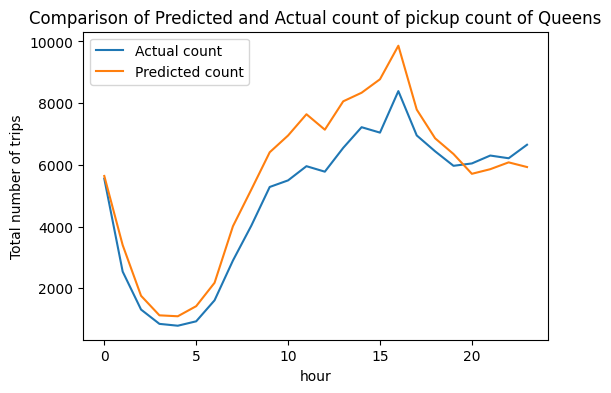

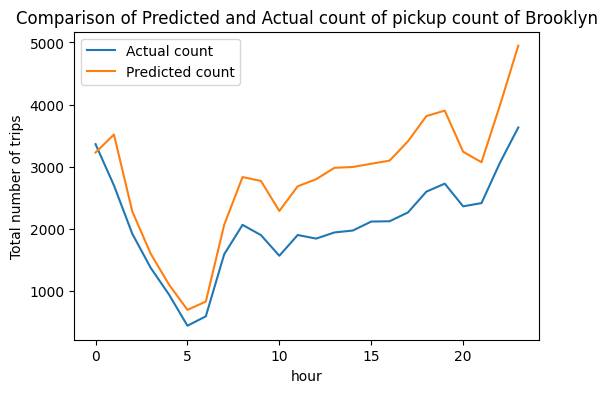

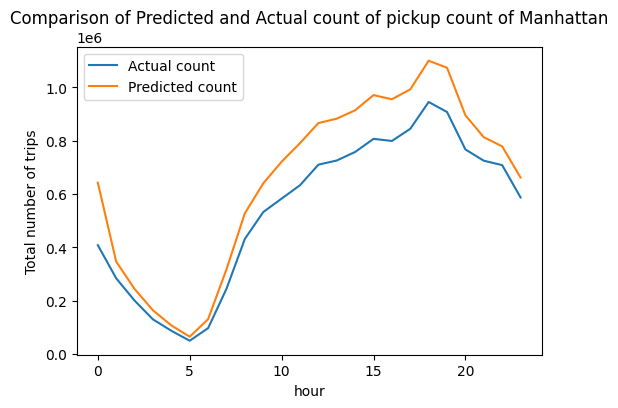

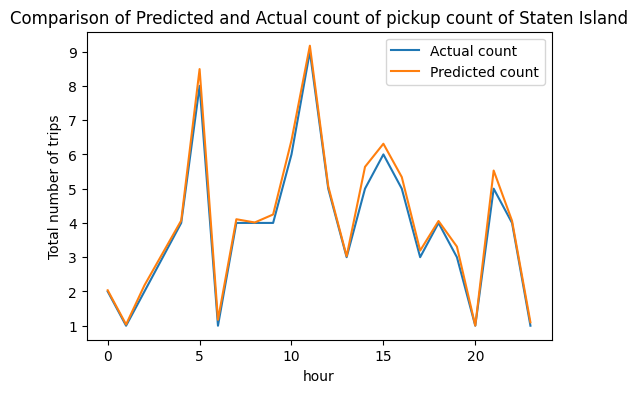

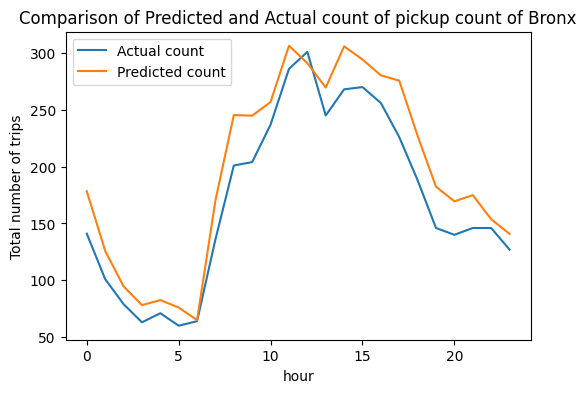

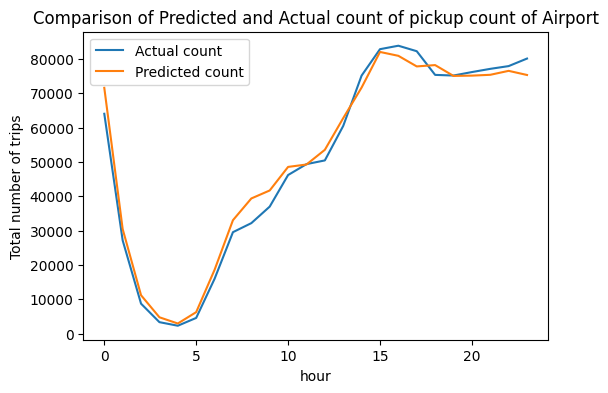

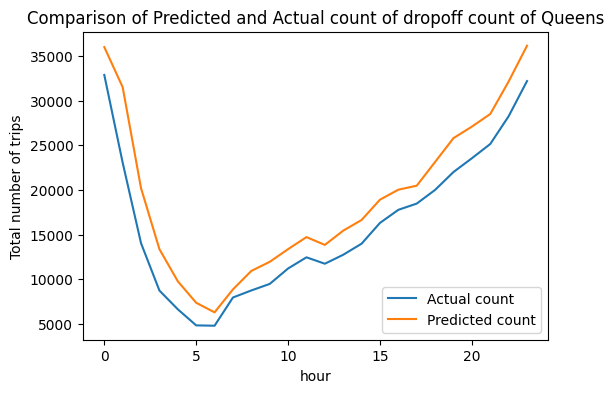

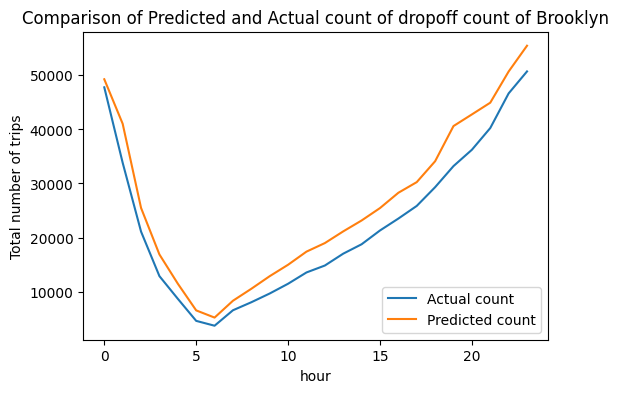

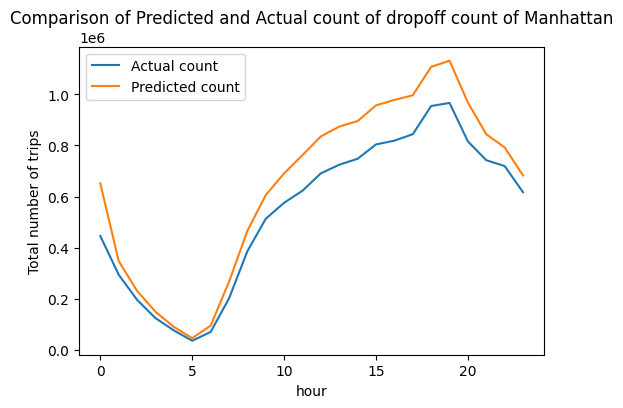

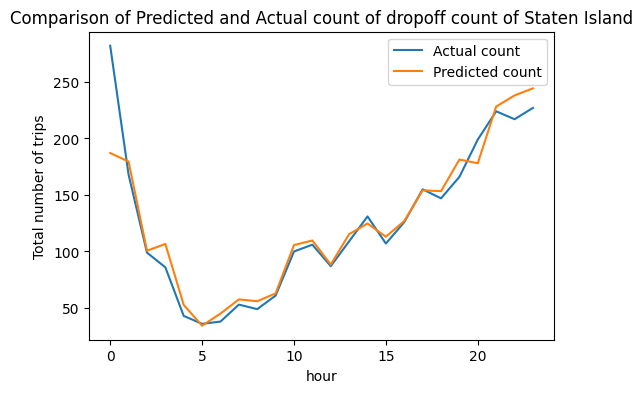

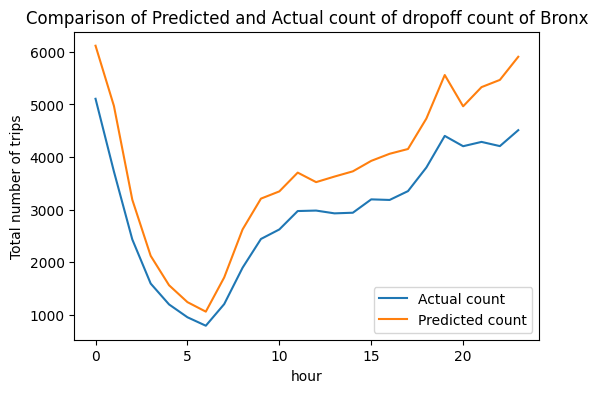

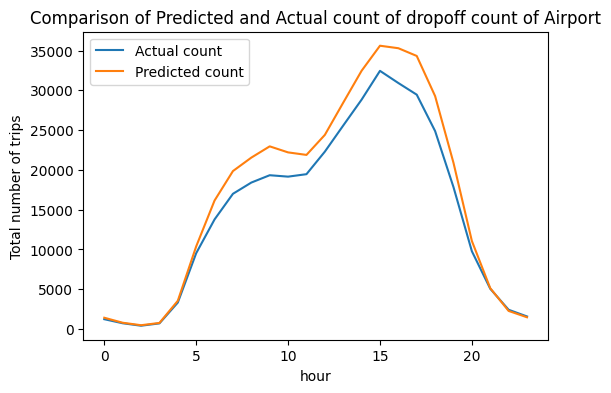

In [7]:
metrics = []
for (data_type, borough, df) in borough_data:
    # Filter the dataset
    X_train = df.loc[df['year'] == 2022].drop(['year', data_type+'_count'], axis=1)
    X_test = df.loc[df['year'] == 2023].drop(['year', data_type+'_count'], axis=1)
    y_train = df.loc[df['year'] == 2022][data_type+'_count']
    y_test = df.loc[df['year'] == 2023][data_type+'_count']

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # RFR training
    regr = RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=2, 
                        max_features=None, random_state=42).fit(X_train_scaled, y_train)

    y_pred = regr.predict(X_test_scaled)
    mae = round(mean_absolute_error(y_test, y_pred), 4)
    
    print(data_type)
    print(borough, "MAE:  ", mae)
    metrics.append((data_type, borough, mae))

    # Plot the actual vs predicted line plot of the data.
    if data_type == 'pickup':
        cat_features_names = categorical_features_pu
        encoder = enc
    else:
        cat_features_names = categorical_features_do
        encoder = enc2
    
    # Get categorical features from encoded features
    categorical = encoder.inverse_transform(X_test.drop(['Shape_Area', 'num_stops'], axis=1))
    categorical_df = pd.DataFrame(categorical, columns=cat_features_names)
    y_pred_df = pd.DataFrame(y_pred, columns=['pred'])
    y_test_df = y_test.reset_index()
    result = pd.concat([categorical_df, y_test_df, y_pred_df], axis=1)
    plot_(result, data_type, borough)
    